## Data Analytics (Basic EDA)

In [9]:
import os
os.getcwd()

'C:\\Users\\sandi\\Documents\\python prog'

###  Import Libraties

In [1]:
# Main Packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error
from pmdarima.model_selection import train_test_split
from pmdarima import auto_arima
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings

C:\Users\sandi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\sandi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### Import Datasets

In [2]:
# Customers, Sellers and Olist Geolocation 
customer_data= pd.read_csv('H:/project/olist_customers_dataset.csv')
seller_data= pd.read_csv('H:/project/olist_sellers_dataset.csv')
geolocation_data= pd.read_csv('H:/project/olist_geolocation_dataset.csv')
product_data= pd.read_csv('H:/project/olist_products_dataset.csv')
order_data= pd.read_csv('H:/project/olist_orders_dataset.csv')
order_item_data= pd.read_csv('H:/project/olist_order_items_dataset.csv')
order_payment_data= pd.read_csv('H:/project/olist_order_payments_dataset.csv')
order_review_data= pd.read_csv('H:/project/olist_order_reviews_dataset.csv')
category_name_trn=pd.read_csv('H:/project/product_category_name_translation.csv')

# Removing duplicate rows


In [3]:
customer_data.drop_duplicates(inplace=True)
seller_data.drop_duplicates(inplace=True)
geolocation_data.drop_duplicates(inplace=True)
product_data.drop_duplicates(inplace=True)
order_data.drop_duplicates(inplace=True)
order_item_data.drop_duplicates(inplace=True)
order_payment_data.drop_duplicates(inplace=True)
order_review_data.drop_duplicates(inplace=True)

In [4]:
def overview(dataframe):
    """This function will return the overview of the dataframe"""
    
    print("Shape of the dataframe is : {}".format(dataframe.shape))
    print("**"*30)
    print("Information about features : ",dataframe.info())
    print("**"*30)
    print("Total number of null values : \n ",dataframe.isnull().sum())
    print("**"*30)
    
    return dataframe.head(3)

In [342]:
overview(customer_data)

Shape of the dataframe is : (99441, 5)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Information about features :  None
************************************************************
Total number of null values : 
  customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
************************************************************


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [343]:
overview(seller_data)

Shape of the dataframe is : (3095, 4)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Information about features :  None
************************************************************
Total number of null values : 
  seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
************************************************************


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [344]:
overview(geolocation_data)

Shape of the dataframe is : (1000163, 5)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Information about features :  None
************************************************************
Total number of null values : 
  geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: in

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [345]:
overview(product_data)
#(product_data['product_category_name'].nunique())

Shape of the dataframe is : (32951, 9)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Information about features :  None
************************************************************
Total number of n

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [346]:
overview(category_name_trn)

Shape of the dataframe is : (71, 2)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Information about features :  None
************************************************************
Total number of null values : 
  product_category_name            0
product_category_name_english    0
dtype: int64
************************************************************


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [5]:
product_data=pd.merge(product_data,category_name_trn,on='product_category_name',how='left')
product_data=product_data.drop('product_category_name',axis=1)
product_data=product_data.rename(columns={'product_category_name_english':'product_category_name'})

overview(product_data)

Shape of the dataframe is : (32951, 9)
************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_name_lenght         32341 non-null  float64
 2   product_description_lenght  32341 non-null  float64
 3   product_photos_qty          32341 non-null  float64
 4   product_weight_g            32949 non-null  float64
 5   product_length_cm           32949 non-null  float64
 6   product_height_cm           32949 non-null  float64
 7   product_width_cm            32949 non-null  float64
 8   product_category_name       32328 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.5+ MB
Information about features :  None
************************************************************
Total number of n

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure


In [348]:
overview(order_data)

Shape of the dataframe is : (99441, 8)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Information about features :  None
************************************************************
Total number of null values : 
  order_id                         

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [349]:
overview(order_item_data)

Shape of the dataframe is : (112650, 7)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Information about features :  None
************************************************************
Total number of null values : 
  order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price         

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [351]:
overview(order_payment_data)

Shape of the dataframe is : (103886, 5)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Information about features :  None
************************************************************
Total number of null values : 
  order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
************************************************************


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [6]:
order_1=pd.merge(order_item_data,order_payment_data,on='order_id',how='left')

In [7]:
order_2=pd.merge(order_1,order_data,on='order_id',how='left')

In [8]:
order_prod=pd.merge(order_2,product_data,on='product_id',how='left')

In [9]:
ops=pd.merge(order_prod,seller_data,on='seller_id',how='left')

In [10]:
opsc=pd.merge(ops,customer_data,on='customer_id',how='left')

In [11]:
overview(opsc)

Shape of the dataframe is : (117604, 33)
************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 117604 entries, 0 to 117603
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117604 non-null  object 
 1   order_item_id                  117604 non-null  int64  
 2   product_id                     117604 non-null  object 
 3   seller_id                      117604 non-null  object 
 4   shipping_limit_date            117604 non-null  object 
 5   price                          117604 non-null  float64
 6   freight_value                  117604 non-null  float64
 7   payment_sequential             117601 non-null  float64
 8   payment_type                   117601 non-null  object 
 9   payment_installments           117601 non-null  float64
 10  payment_value                  117601 non-null  fl

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_height_cm,product_width_cm,product_category_name,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1.0,credit_card,2.0,...,9.0,14.0,cool_stuff,27277,volta redonda,SP,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,1.0,credit_card,3.0,...,30.0,40.0,pet_shop,3471,sao paulo,SP,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,1.0,credit_card,5.0,...,13.0,33.0,furniture_decor,37564,borda da mata,MG,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG


In [12]:
opsc.iloc[:,13]=pd.to_datetime(opsc['order_purchase_timestamp'])

In [13]:
opsc['order_purchase_timestamp']=opsc['order_purchase_timestamp'].dt.date

In [14]:
opsc_1=opsc.copy()

In [15]:
opsc_1['product_photos_qty']=opsc_1['product_photos_qty'].replace(np.nan,1)

In [16]:
opsc_1['product_category_name']=opsc_1['product_category_name'].replace(np.nan,'null')

In [17]:
opsc_1=opsc_1.dropna()

In [18]:
overview(opsc_1)

Shape of the dataframe is : (113390, 33)
************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 113390 entries, 0 to 117603
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113390 non-null  object 
 1   order_item_id                  113390 non-null  int64  
 2   product_id                     113390 non-null  object 
 3   seller_id                      113390 non-null  object 
 4   shipping_limit_date            113390 non-null  object 
 5   price                          113390 non-null  float64
 6   freight_value                  113390 non-null  float64
 7   payment_sequential             113390 non-null  float64
 8   payment_type                   113390 non-null  object 
 9   payment_installments           113390 non-null  float64
 10  payment_value                  113390 non-null  fl

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_height_cm,product_width_cm,product_category_name,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1.0,credit_card,2.0,...,9.0,14.0,cool_stuff,27277,volta redonda,SP,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,1.0,credit_card,3.0,...,30.0,40.0,pet_shop,3471,sao paulo,SP,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,1.0,credit_card,5.0,...,13.0,33.0,furniture_decor,37564,borda da mata,MG,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG


In [365]:
opsc_1.iloc[:,13]

0         2017-09-13
1         2017-04-26
2         2018-01-14
3         2018-08-08
4         2017-02-04
             ...    
117599    2018-04-23
117600    2018-07-14
117601    2017-10-23
117602    2017-08-14
117603    2018-06-09
Name: order_purchase_timestamp, Length: 113390, dtype: object

In [19]:
# opsc_1.iloc[:,[5,6,10]]
opsc_1['total']=opsc_1['price']+opsc_1['freight_value']
opsc_1['volume']=opsc_1['product_length_cm']*opsc_1['product_height_cm']*opsc_1['product_width_cm']

In [20]:
opsc_2=opsc_1.groupby(by='order_purchase_timestamp').agg({'total':'sum','product_name_lenght':'mean','product_description_lenght':'mean','product_photos_qty':'mean',
                                                        'product_weight_g':'mean','product_length_cm':'mean','product_height_cm':'mean','product_width_cm':'mean',
                                                         'payment_installments':'mean','volume':'mean'}).reset_index()

In [21]:
opsc_2.iloc[:,4]=opsc_2.iloc[:,4].astype(int)
opsc_2.iloc[:,9]=opsc_2.iloc[:,9].astype(int)

In [72]:
overview(opsc_2)

Shape of the dataframe is : (611, 11)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_purchase_timestamp    611 non-null    object 
 1   total                       611 non-null    float64
 2   product_name_lenght         611 non-null    float64
 3   product_description_lenght  611 non-null    float64
 4   product_photos_qty          611 non-null    int32  
 5   product_weight_g            611 non-null    float64
 6   product_length_cm           611 non-null    float64
 7   product_height_cm           611 non-null    float64
 8   product_width_cm            611 non-null    float64
 9   payment_installments        611 non-null    int32  
 10  volume                      611 non-null    float64
dtypes: float64(8), int32(2), object(1)
memory usage: 4

,order_purchase_timestamp,total,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_installments,volume
0,2016-10-03,595.14,47.625000,555.750000,1,2825.500000,27.000000,13.250000,26.125000,2,12605.500000
1,2016-10-04,10438.44,48.463768,835.478261,1,2223.260870,33.072464,19.826087,23.246377,3,17567.913043
2,2016-10-05,7423.12,47.862745,812.607843,1,2252.686275,28.235294,23.882353,23.705882,3,20295.411765


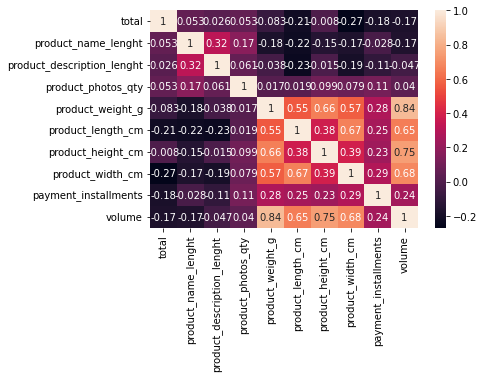

In [22]:
corr=opsc_2.corr()
# corr.style.background_gradient(cmap='coolwarm')
# cr.savefig('H:/project/cor.png')
sns.heatmap(corr,annot=True)
# plt.savefig('H:/project/corr.png',bbox_inches='tight')

In [371]:

overview(order_review_data)

Shape of the dataframe is : (99224, 7)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Information about features :  None
************************************************************
Total number of null values : 
  review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
revi

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [17]:
# There are some columns that I deem unnecessary 
# order_payment_data.drop(['payment_sequential','payment_installments'], axis=1, inplace=True)
# order_review_data.drop(['review_comment_title','review_creation_date','review_answer_timestamp'], axis=1,inplace=True)

In [19]:
geolocation_data.columns=['geolocation_zip_code', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state']

In [20]:
order_item_data.rename(columns={'order_item_id':'quantity'}, inplace = True)

In [21]:
order_item_data= order_item_data.assign(sale= lambda x: x['quantity']*x['price'])

In [22]:
order_item_data.head()

,order_id,quantity,product_id,seller_id,shipping_limit_date,price,freight_value,sale
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90


### Which Product categories should Olist focus on ?

#### - [About Review rating and Number of Review Message]

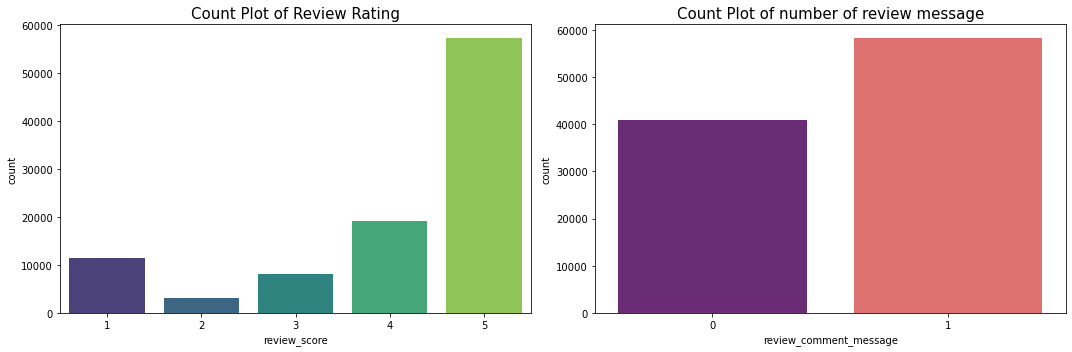

In [23]:
# Count plot for review_score 
fig, ax= plt.subplots(ncols=2,figsize=(15,5))
sns.countplot(x='review_score', data=order_review_data, palette='viridis', ax=ax[0])
ax[0].set_title('Count Plot of Review Rating', fontsize=15)
sns.countplot(x='review_comment_message', palette='magma', ax=ax[1],
              data=pd.DataFrame(order_review_data['review_comment_message'].isna()).astype(int))
ax[1].set_title('Count Plot of number of review message', fontsize=15)
fig.tight_layout();
fig.savefig('H:/project/review.png')

In [24]:
display((order_review_data['review_score'].isin([4,5])).sum(), # number of high review
(order_review_data['review_comment_message'].isna()).sum()) # number of no comment

76470

58247

#### Interpretation:
- In general, all the orders have high review ratings, with over 77% of high ratings (4,5)
- Over half of customer don't leave comments (around 58.7%)

#### - [Average Rating and Number of Review by Product categories]

In [25]:
# We aim to calculate the mean rating of all product categories 
# we merge 3 df(s): review + order_item + product 
rating_product= pd.merge(order_review_data, order_item_data[['order_id','product_id']]
         , on='order_id').merge(product_data[['product_id','product_category_name']], on='product_id')
rating_product['num review']= rating_product['review_comment_message'].notna().astype(int)
rating_product.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_id,product_category_name,num review
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,fd25ab760bfbba13c198fa3b4f1a0cd3,sports_leisure,0
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,fd25ab760bfbba13c198fa3b4f1a0cd3,sports_leisure,0


In [26]:
k=rating_product.groupby(by='product_category_name').agg({'num review':['sum','mean']}).reset_index()
#.droplevel(0,axis=1)
k.columns = pd.Index([e[0]+e[1] for e in k.columns.tolist()])
k.info()
k.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_category_name  71 non-null     object 
 1   num reviewsum          71 non-null     int32  
 2   num reviewmean         71 non-null     float64
dtypes: float64(1), int32(1), object(1)
memory usage: 1.5+ KB


,product_category_name,num reviewsum,num reviewmean
0,agro_industry_and_commerce,66,0.311321
1,air_conditioning,128,0.438356
2,art,88,0.425121
3,arts_and_craftmanship,12,0.500000
4,audio,164,0.454294


In [27]:
# Number and percentage of review
review_product= rating_product.groupby(by='product_category_name').agg({'num review':['sum','mean']}).reset_index()
review_product.columns = pd.Index([e[0]+e[1] for e in review_product.columns.tolist()])
review_product.rename(columns={'num reviewsum':'num review','num reviewmean':'% review'}, inplace=True)
# Average rating score
mean_rating_product= rating_product.groupby(by='product_category_name')['review_score'].mean()
mean_rating_product= pd.DataFrame(mean_rating_product).sort_values('review_score', ascending=False)
display(review_product.sort_values('num review', ascending=False).head(5), 
        review_product.sort_values('% review', ascending=False).head(5),
        mean_rating_product.head(5))

,product_category_name,num review,% review
7,bed_bath_table,5242,0.470683
43,health_beauty,3751,0.388906
39,furniture_decor,3578,0.429480
65,sports_leisure,3438,0.397917
15,computers_accessories,3290,0.419162


,product_category_name,num review,% review
61,security_and_services,2,1.000000
30,fashion_male_clothing,75,0.572519
47,home_confort,245,0.563218
46,home_comfort_2,14,0.518519
58,party_supplies,22,0.511628


,review_score
product_category_name,
cds_dvds_musicals,4.642857
fashion_childrens_clothes,4.500000
books_general_interest,4.446266
costruction_tools_tools,4.444444
flowers,4.419355


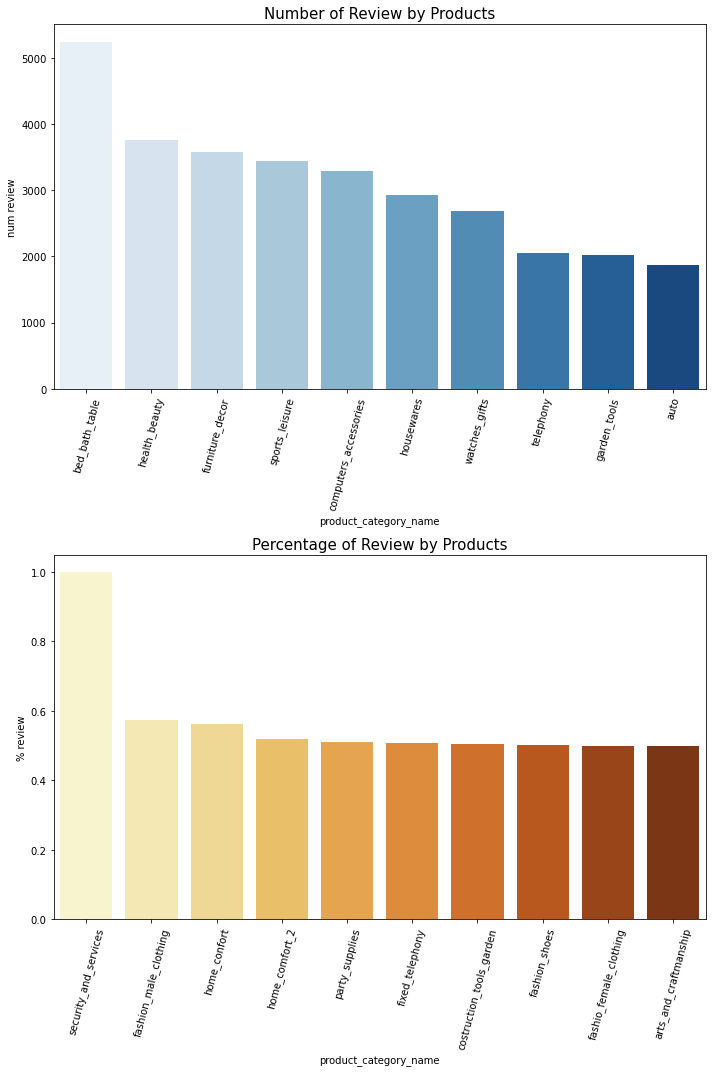

In [28]:
fig, ax= plt.subplots(nrows=2, figsize=(10,15))
sns.barplot(x='product_category_name',y='num review', palette='Blues',
           data=review_product.reset_index().sort_values('num review', ascending=False).head(10), ax=ax[0])
sns.barplot(x='product_category_name',y='% review',palette="YlOrBr",
           data=review_product.reset_index().sort_values('% review', ascending=False).head(10), ax=ax[1])
ax[0].set_title('Number of Review by Products', fontsize=15)
ax[1].set_title('Percentage of Review by Products', fontsize=15)
ax[0].tick_params(axis='x', labelrotation=75)
ax[1].tick_params(axis='x', labelrotation=75)
fig.tight_layout();
fig.savefig('H:/project/review_no.png')

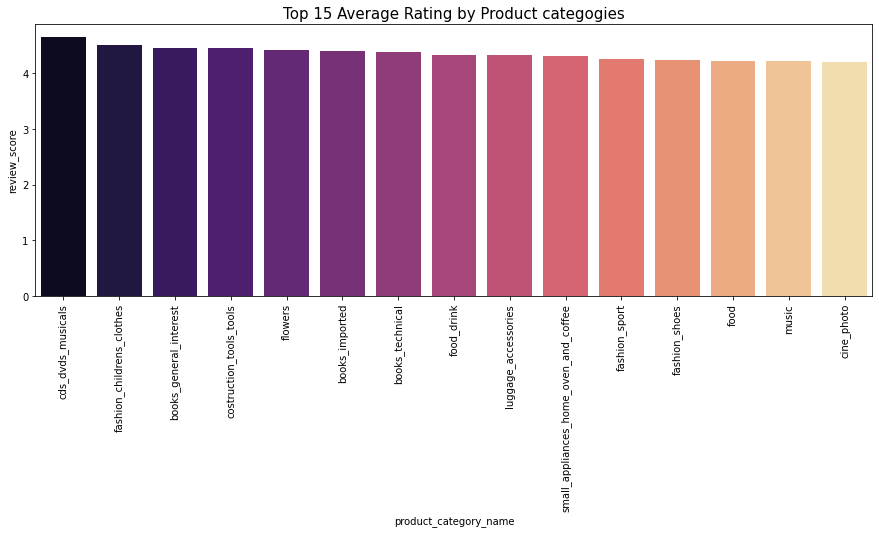

In [29]:
fig, ax= plt.subplots(figsize=(15,5))
sns.barplot(x='product_category_name',y='review_score', data=mean_rating_product.reset_index().head(15),
            palette='magma',ax=ax)
ax.set_title('Top 15 Average Rating by Product categogies', fontsize=15)
plt.xticks(rotation = 90);
fig.savefig('H:/project/product_rating.png',bbox_inches='tight')

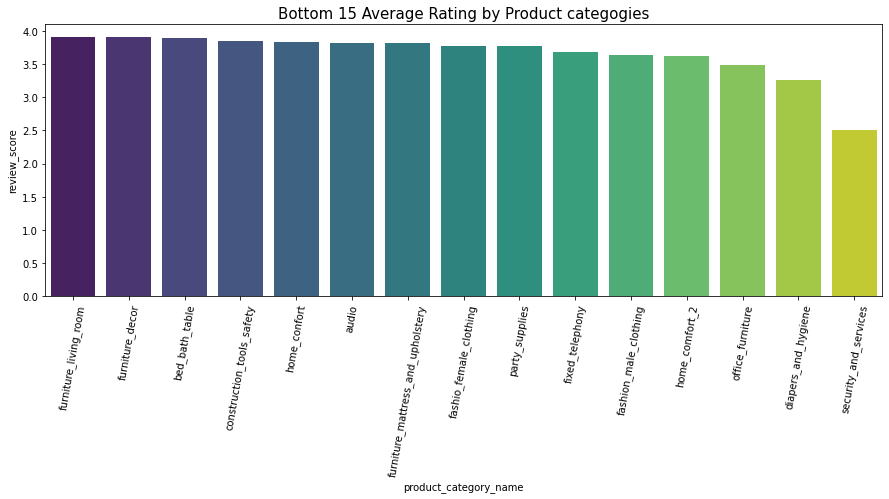

In [30]:
fig, ax= plt.subplots(figsize=(15,5))
sns.barplot(x='product_category_name',y='review_score', data=mean_rating_product.reset_index().tail(15),
            palette='viridis',ax=ax)
ax.set_title('Bottom 15 Average Rating by Product categogies', fontsize=15)
plt.xticks(rotation = 80);
fig.savefig('H:/project/proRate.png',bbox_inches='tight')

#### Interpretation:
- Overall, all product Categories have high and consistent average rating scores, with low rating is just roughly under 4/5
- The list of top 15 and bottom 15 product categories are shown above.

#### -    [Number of orders, Quantity of sold units and Sale by Product categories]

In [31]:
# We aim to calculate total number of sold units by product categories 
# We merge 2 df(s): order_item + product
quantity_sale_product= pd.merge(order_item_data[['quantity','product_id','price','order_id']],
                           product_data[['product_id','product_category_name']], on='product_id')

quantity_sale_product['sale']= quantity_sale_product['quantity']*quantity_sale_product['price']
quantity_sale_product.head(2)

,quantity,product_id,price,order_id,product_category_name,sale
0,1,4244733e06e7ecb4970a6e2683c13e61,58.9,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,58.9
1,1,4244733e06e7ecb4970a6e2683c13e61,55.9,130898c0987d1801452a8ed92a670612,cool_stuff,55.9


In [32]:
# Total number of Sale by products 
order_product= quantity_sale_product.groupby(by='product_category_name')['order_id'].nunique()
order_product= pd.DataFrame(order_product).sort_values('order_id', ascending=False).rename(columns={'order_id':'num of order'})

# Total sold units by products 
quantity_product= quantity_sale_product.groupby(by='product_category_name')['quantity'].sum()
quantity_product= pd.DataFrame(quantity_product).sort_values('quantity', ascending=False)
# Total sale by products 
sale_product= quantity_sale_product.groupby(by='product_category_name')['sale'].sum()
sale_product= pd.DataFrame(sale_product).sort_values('sale', ascending=False)

display(order_product.head(5),quantity_product.head(5),sale_product.head(5))

,num of order
product_category_name,
bed_bath_table,9417
health_beauty,8836
sports_leisure,7720
computers_accessories,6689
furniture_decor,6449


,quantity
product_category_name,
bed_bath_table,13665
furniture_decor,11540
health_beauty,11081
sports_leisure,9932
computers_accessories,9874


,sale
product_category_name,
health_beauty,1347468.49
watches_gifts,1259634.58
bed_bath_table,1228795.46
computers_accessories,1135454.64
sports_leisure,1082435.42


In [33]:
# We can find the list of all 'target' product categories that Olist should focus on 
# By finding the intersection of top categories in above 3 datasets 
n=30
target_products= list(set(order_product.head(n).index.tolist())&
                     set(quantity_product.head(n).index.tolist())&
                    set(sale_product.head(n).index.tolist()))
target_products[:20]

['sports_leisure',
 'baby',
 'furniture_decor',
 'luggage_accessories',
 'housewares',
 'consoles_games',
 'health_beauty',
 'telephony',
 'toys',
 'auto',
 'construction_tools_construction',
 'stationery',
 'furniture_living_room',
 'small_appliances',
 'watches_gifts',
 'garden_tools',
 'office_furniture',
 'pet_shop',
 'cool_stuff',
 'fashion_bags_accessories']

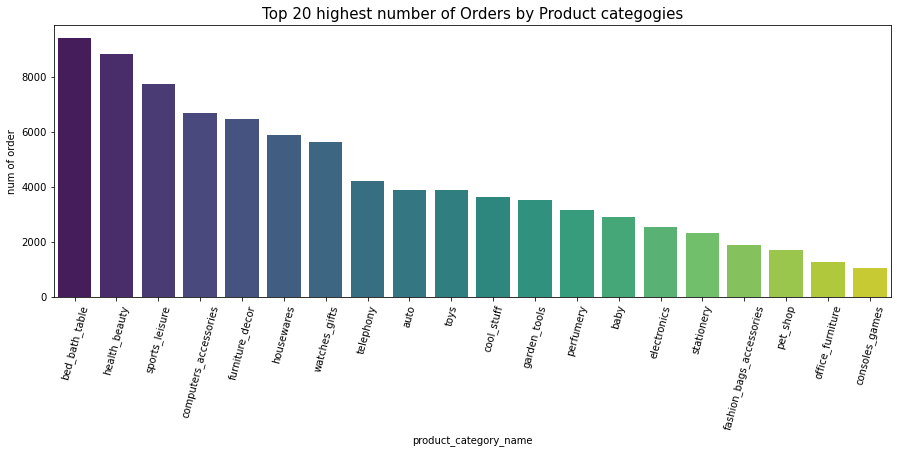

In [34]:
# Visualization for Num of orders by product categories 
fig, ax= plt.subplots(figsize=(15,5))
sns.barplot(x='product_category_name',y='num of order', data=order_product.reset_index().head(20),
            palette='viridis',ax=ax)
ax.set_title('Top 20 highest number of Orders by Product categogies', fontsize=15)
plt.xticks(rotation = 75);
fig.savefig('H:/project/order_product_top.png',bbox_inches='tight')

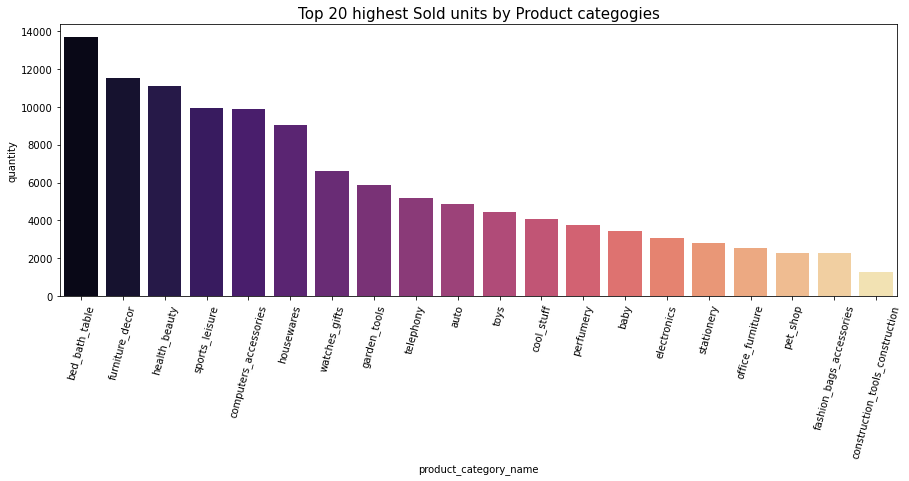

In [35]:
# Visualization for Num of sold units by product categories 
fig, ax= plt.subplots(figsize=(15,5))
sns.barplot(x='product_category_name',y='quantity', data=quantity_product.reset_index().head(20),
            palette='magma',ax=ax)
ax.set_title('Top 20 highest Sold units by Product categogies', fontsize=15)
plt.xticks(rotation = 75);
fig.savefig('H:/project/qty_product_top.png',bbox_inches='tight')

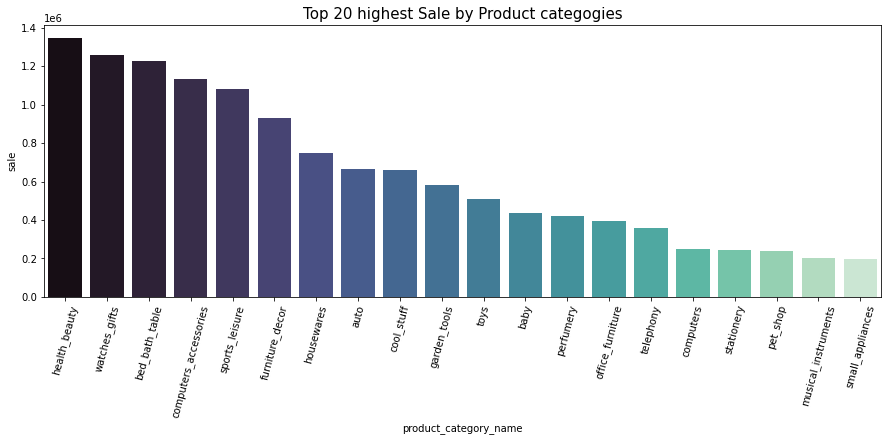

In [36]:
# Visualization for Num of sale by product categories 
fig, ax= plt.subplots(figsize=(15,5))
sns.barplot(x='product_category_name',y='sale', data=sale_product.reset_index().head(20),
            palette='mako',ax=ax)
ax.set_title('Top 20 highest Sale by Product categogies', fontsize=15)
plt.xticks(rotation = 75);
fig.savefig('H:/project/sale_product_top.png',bbox_inches='tight')

### Which States have highest number of Customers, Orders?

In [37]:
# Each customer has only 1 customer_unique_id, hence we count number of customers by state as below: 
state_customer= customer_data.groupby('customer_state')['customer_unique_id'].nunique().to_frame().sort_values('customer_unique_id', 
                                                                                               ascending=False)
state_customer.head()

,customer_unique_id
customer_state,
SP,40302
RJ,12384
MG,11259
RS,5277
PR,4882


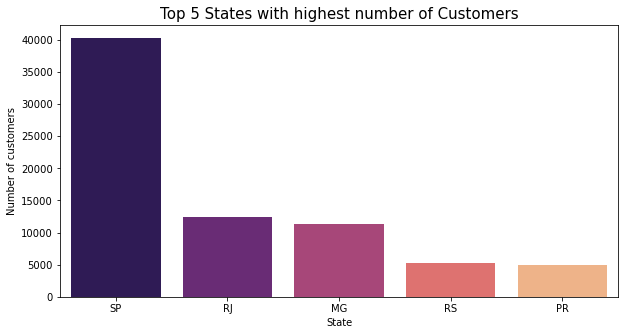

In [38]:
fig, ax= plt.subplots(figsize=(10,5))
sns.barplot(x='customer_state', y='customer_unique_id', 
            data=state_customer.reset_index().head(),palette='magma',ax=ax)
ax.set_title('Top 5 States with highest number of Customers', fontsize=15)
ax.set_xlabel('State')
ax.set_ylabel('Number of customers');

In [39]:
# Each customer_id represent for an order, hence we count number of orders by state as below: 
state_order= customer_data.groupby('customer_state',as_index=False)['customer_id'].count()
state_order.columns=['State','Number of Order']
state_order.sort_values('Number of Order',ascending=False, inplace=True)
state_order.head()

,State,Number of Order
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045


Text(0.5, 1.0, 'Top 5 States with highest number of Orders')

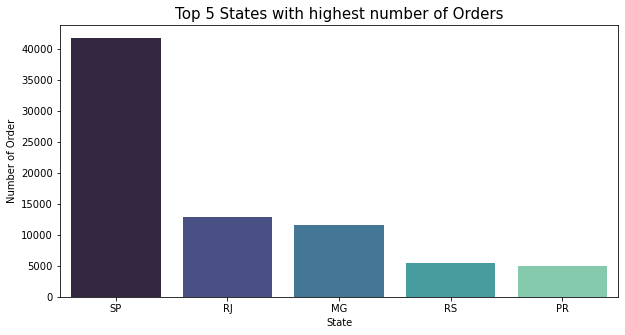

In [40]:
fig, ax= plt.subplots(figsize=(10,5))
sns.barplot(x='State', y='Number of Order', 
            data=state_order.head(),palette='mako',ax=ax)
ax.set_title('Top 5 States with highest number of Orders', fontsize=15)

### Which Cities have highest number of Orders ?

In [41]:
# We calculate number of orders by each city 
city_order= customer_data.groupby('customer_city',as_index=False)['customer_id'].count().sort_values('customer_id',
                                                                                              ascending=False)
city_order.columns=['City','Number of Order']
city_order.head()

,City,Number of Order
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521


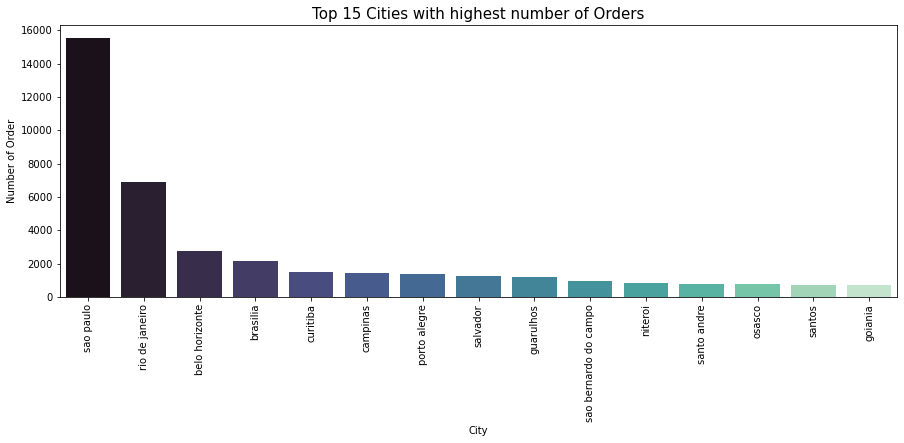

In [42]:
fig, ax= plt.subplots(figsize=(15,5))
sns.barplot(x='City', y='Number of Order', 
            data=city_order.head(15),palette='mako',ax=ax)
ax.set_title('Top 15 Cities with highest number of Orders', fontsize=15)
ax.tick_params(axis='x', labelrotation=90)

#### Iterpretation:
- It can be seen that the high number of orders in each Target State is dominated by few Cities
- For eg, for SP state is Sao Paulo, RJ state is Rio de Janerio,....

### Which States, Cities have highest number of Sellers ?

In [43]:
seller_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [44]:
# Number of sellers by states  
state_seller= seller_data.groupby('seller_state',as_index=False)['seller_id'].count().sort_values('seller_id',
                                                                                                  ascending=False)
state_seller.columns=['State','Number of Sellers']
state_seller.head()

,State,Number of Sellers
22,SP,1849
15,PR,349
8,MG,244
20,SC,190
16,RJ,171


In [45]:
city_seller= seller_data.groupby('seller_city',as_index=False)['seller_id'].count().sort_values('seller_id',
                                                                                                  ascending=False)
city_seller.columns=['City','Number of Sellers']
city_seller.head()

,City,Number of Sellers
517,sao paulo,694
159,curitiba,127
450,rio de janeiro,96
64,belo horizonte,68
442,ribeirao preto,52


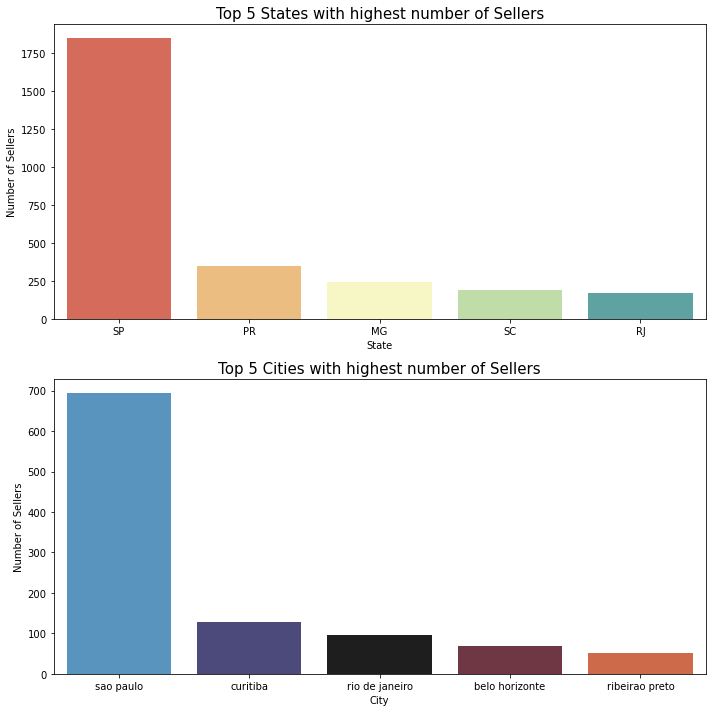

In [46]:
fig, ax= plt.subplots(nrows=2, figsize=(10,10))
sns.barplot(x='State', y='Number of Sellers', data=state_seller.head(), 
           palette="Spectral", ax=ax[0])
sns.barplot(x='City', y='Number of Sellers', data=city_seller.head(), 
           palette="icefire", ax=ax[1])
ax[0].set_title('Top 5 States with highest number of Sellers', fontsize=15)
ax[1].set_title('Top 5 Cities with highest number of Sellers', fontsize=15)
fig.tight_layout();how='left'
fig.savefig('H:/project/state_sale_top.png',bbox_inches='tight')

#### Interpretation:
- In general, top state by number of sellers coincide with top state by customers amounts (except RS for customers and SC for sellers)
- Similarly for top cities in term of customers and sellers (except Brasilia for customers and Ribeirao Preto for sellers)

###  About Payment types ?

In [47]:
order_payment_data.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [48]:
payment_type= order_payment_data.groupby('payment_type',as_index=False)['order_id'].count().sort_values('order_id',
                                                                                         ascending=False)
payment_type

,payment_type,order_id
1,credit_card,76795
0,boleto,19784
4,voucher,5775
2,debit_card,1529
3,not_defined,3


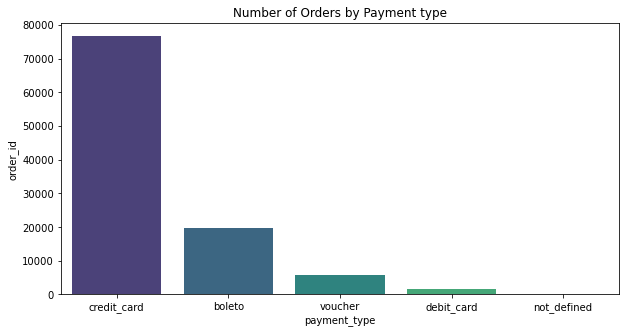

In [49]:
fig, ax= plt.subplots(figsize=(10,5))
sns.barplot(x='payment_type', y='order_id', data=payment_type, palette='viridis', ax=ax)
ax.set_title('Number of Orders by Payment type');

#### Interpretation:
- Most of customers do the purchase by using Credit card

### Total number of orders, quantity of sold items and sale over time ?

In [87]:
warnings.filterwarnings('ignore')

In [56]:
## Outlier adjustment
import statistics
quantity_sale_time.iloc[quantity_sale_time.sale.idxmax(),2] = statistics.mean([quantity_sale_time.iloc[(quantity_sale_time.sale.idxmax()+1),2],quantity_sale_time.iloc[(quantity_sale_time.sale.idxmax()-1),2]])


In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [58]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(quantity_sale_time['sale'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(quantity_sale_time['sale'], model='additive', period=30)


quantity_sale_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_purchase_timestamp  616 non-null    object 
 1   quantity                  616 non-null    int64  
 2   sale                      616 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.6+ KB


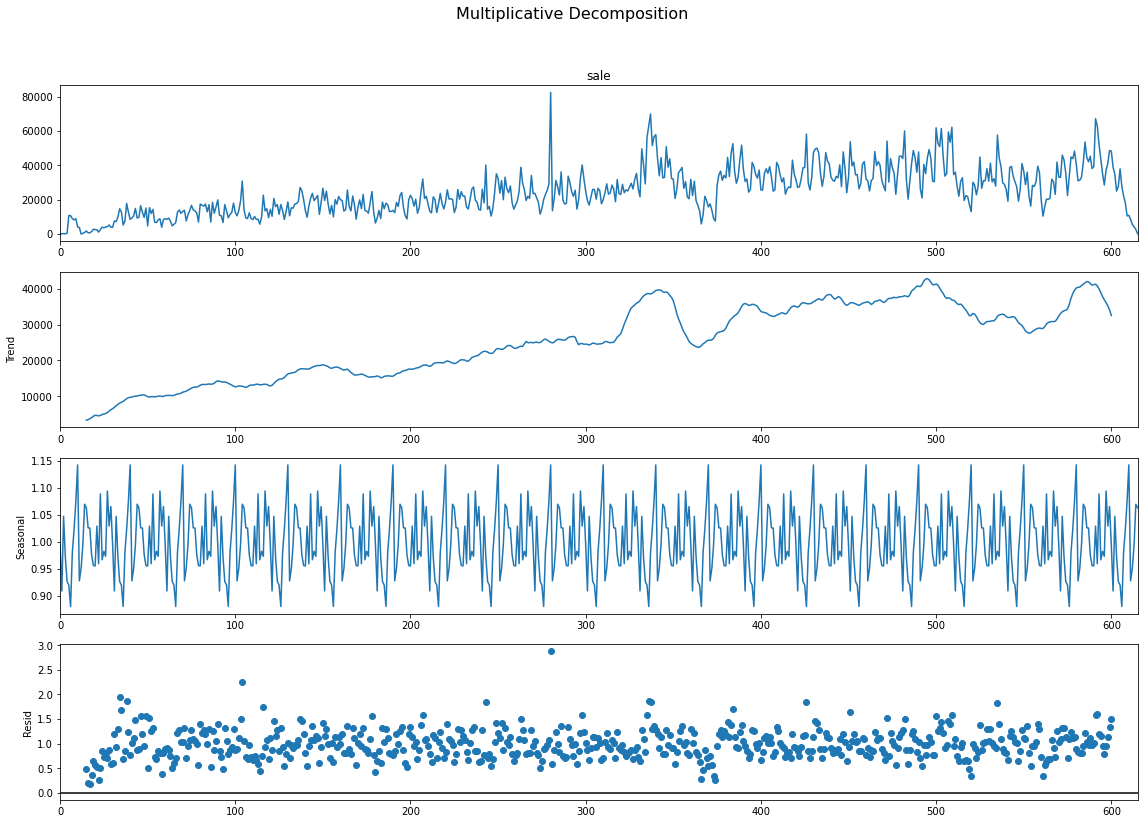

<Figure size 1152x864 with 0 Axes>

In [66]:
# # Plot
# plt.rcParams.update({'figure.figsize': (16,12)})
# multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()
# plt.savefig('H:/project/seasonal_multi.png',bbox_inches='tight')

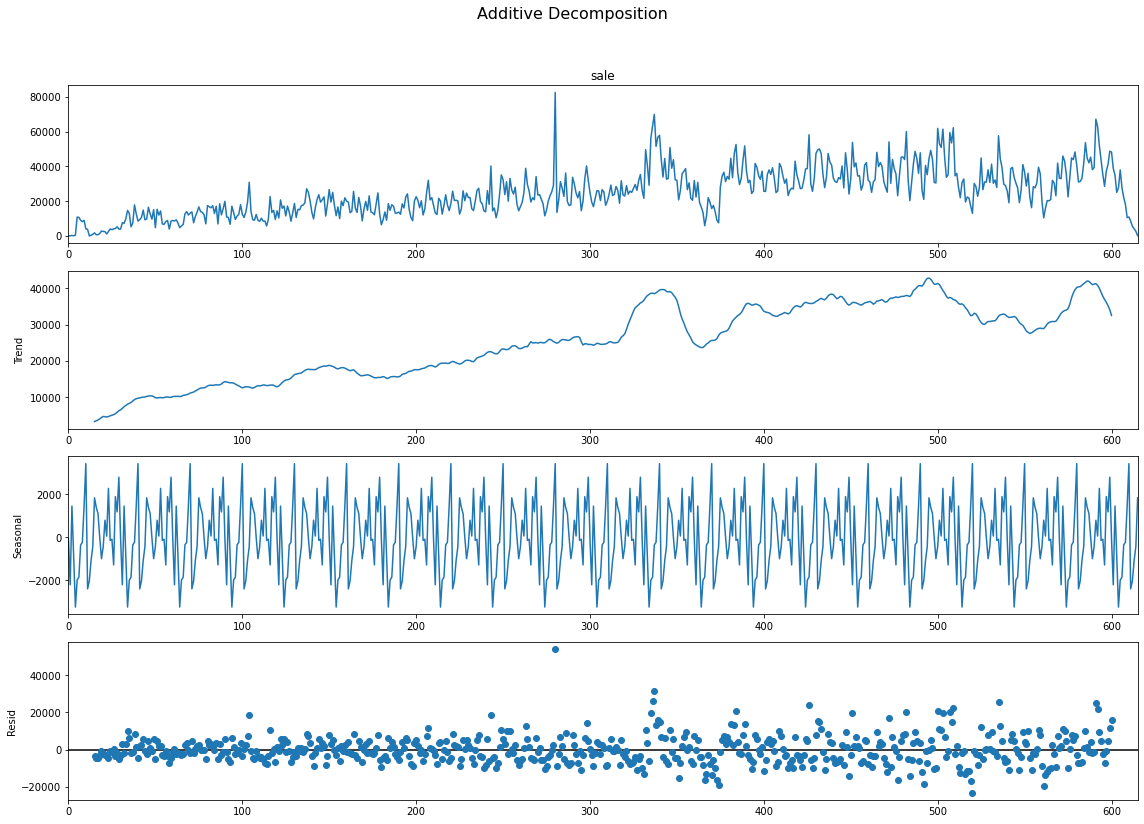

In [63]:
# plt.rcParams.update({'figure.figsize': (16,12)})

# additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# # plt.show()
# plt.savefig('H:/project/seasonal_add.png',bbox_inches='tight')

In [2]:
# ADF Test
# Function to print out results in customised manner
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [69]:
adf_test(quantity_sale_time.sale)

Results of Dickey-Fuller Test:
Test Statistic                  -2.909227
p-value                          0.044285
#Lags Used                      14.000000
Number of Observations Used    601.000000
Critical Value (1%)             -3.441278
Critical Value (5%)             -2.866361
Critical Value (10%)            -2.569338
dtype: float64


Text(0.5, 1.0, 'Detrended by subtracting the least squares fit')

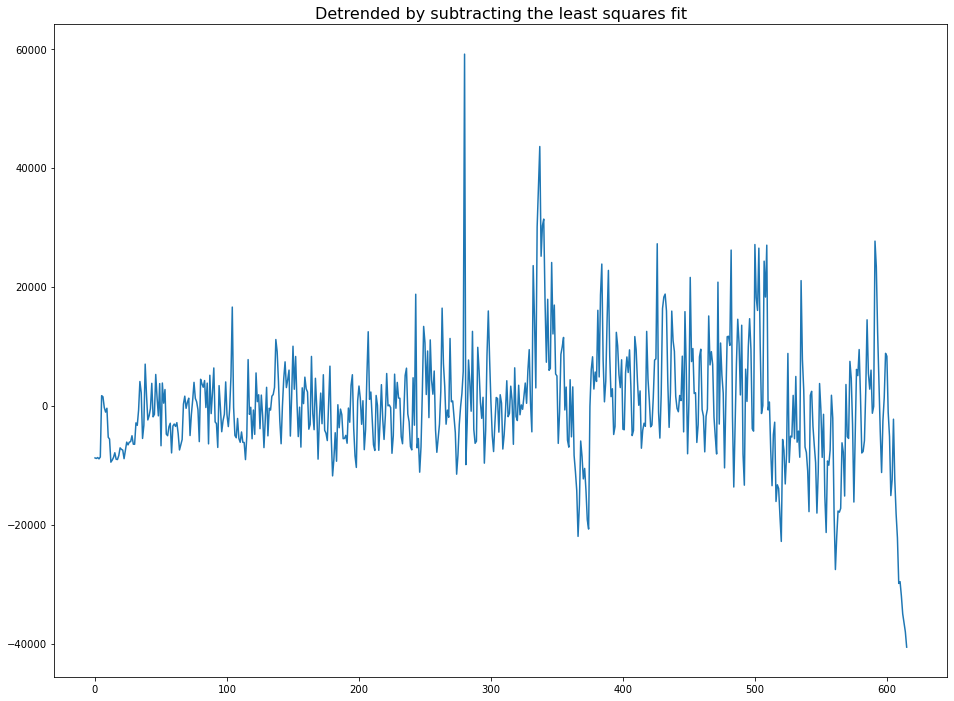

In [70]:
# # Detrend a series
# from scipy import signal
# detrended = signal.detrend(quantity_sale_time['sale'].values)
# plt.plot(detrended)
# plt.title('Detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Detrended by subtracting the trend component')

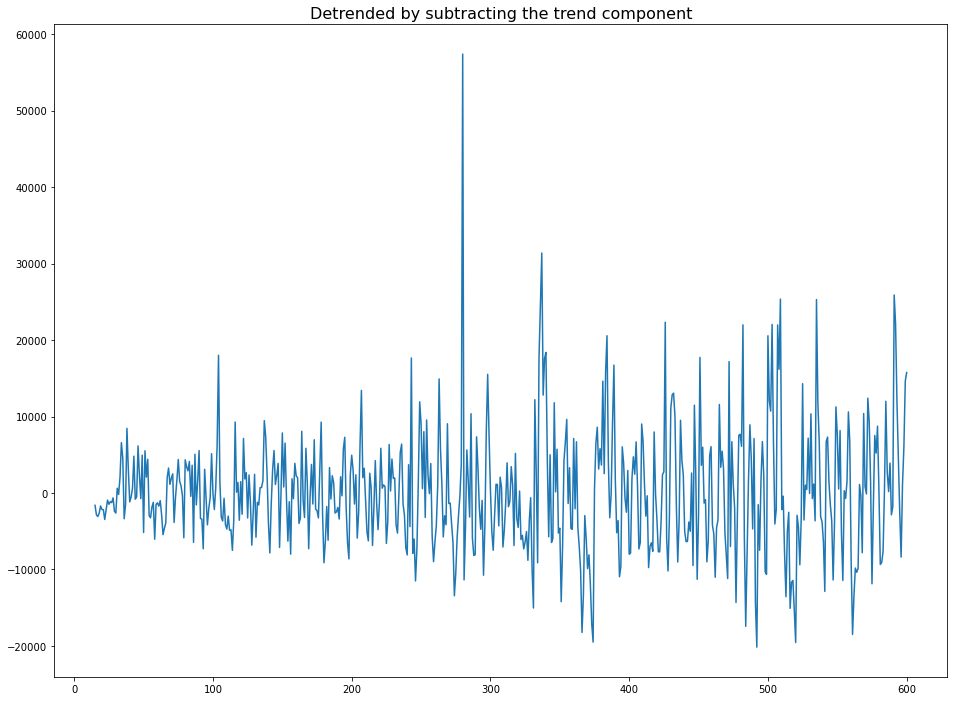

In [71]:
# # Subtracting the Trend Component
# result_mul = seasonal_decompose(quantity_sale_time['sale'], model='multiplicative', period=30)
# detrended = quantity_sale_time['sale'].values - result_mul.trend
# plt.plot(detrended)
# plt.title('Detrended by subtracting the trend component', fontsize=16)

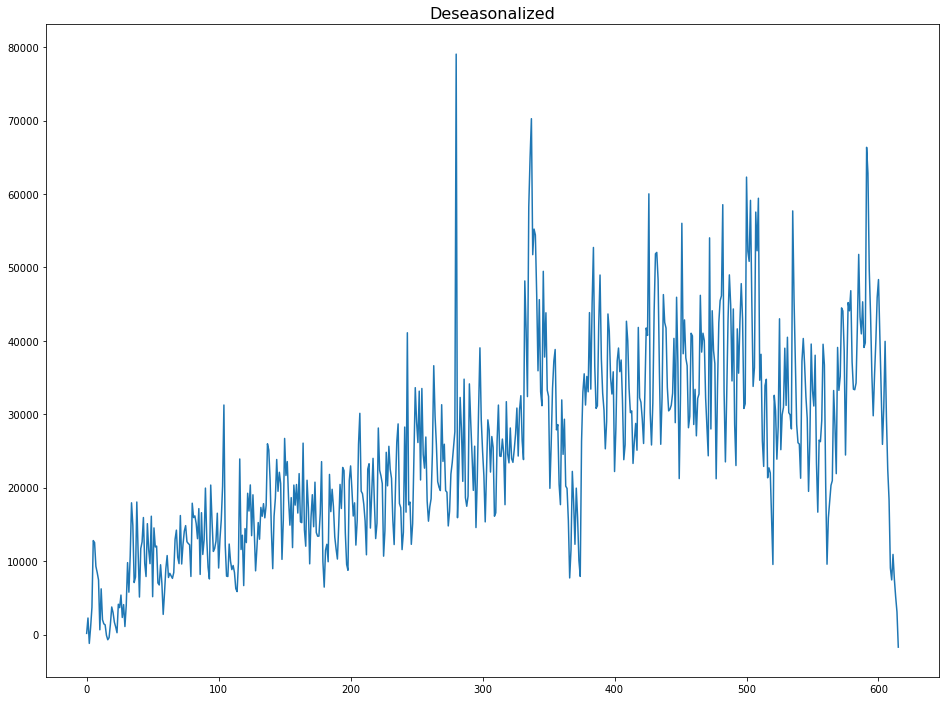

In [72]:
# # Deseasonalize
# deseasonalized = quantity_sale_time.sale - additive_decomposition.seasonal


# # Plot
# plt.plot(deseasonalized)
# plt.title('Deseasonalized', fontsize=16)
# plt.plot()
# plt.savefig('H:/project/deseasonal',bbox_inches='tight')

In [124]:
# from scipy.stats import shapiro
# shapiro(deseasonalized)

ShapiroResult(statistic=0.9807500243186951, pvalue=3.0290374297692324e-07)

In [73]:
adf_test(deseasonalized)

Results of Dickey-Fuller Test:
Test Statistic                  -2.856876
p-value                          0.050597
#Lags Used                      14.000000
Number of Observations Used    601.000000
Critical Value (1%)             -3.441278
Critical Value (5%)             -2.866361
Critical Value (10%)            -2.569338
dtype: float64


### Here we reject the null hypothesis so the deseasonalised data is stationary

In [79]:
# adf_test(additive_decomposition.trend.dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -1.883633
p-value                          0.339799
#Lags Used                      19.000000
Number of Observations Used    566.000000
Critical Value (1%)             -3.441956
Critical Value (5%)             -2.866660
Critical Value (10%)            -2.569497
dtype: float64


In [5]:
from pmdarima import auto_arima

In [174]:
# train_des=deseasonalized.iloc[:int(616*0.9)]
# test_des=deseasonalized.iloc[int(616*0.9+1):]
# # train_des= np.split (deseasonalized, [int (.9 *len (deseasonalized))])
# test_des= np.split (deseasonalized, [int (.1 *len (deseasonalized))])

In [197]:
test_des=test_des.reset_index()
# test_des=test_des.drop('index',axis=1)

In [198]:
test_des=test_des.iloc[:,2]

In [199]:
test_des

0     26489.487069
1     26279.188236
2     29138.352428
3     39540.619169
4     36717.237203
          ...     
56    10926.588194
57     7615.279632
58     5170.188202
59     3093.147983
60    -1697.462931
Name: 0, Length: 61, dtype: float64

In [144]:
train_des

0        177.360386
1       2268.802255
2      -1187.135008
3       1006.593790
4       3710.710527
           ...     
549    39568.788053
550    33249.871150
551    31128.708194
552    38046.229632
553    23384.908202
Length: 554, dtype: float64

In [69]:
# model_arima=auto_arima(train_des)
# model_arima.summary()
# # model_arima.fit().summary()

In [70]:
# pred=model_arima.predict(n_periods=61)
# rmse=print('RMSE is = ',(np.mean(test_ded-pred)**2)**.5)
# mse=mean_squared_error(test_des,pred)
# print('rmse =',np.sqrt(mse))
# plt.plot(test_des)
# plt.plot(pred)

# ***************************************************************

In [27]:
overview(opsc_2)

Shape of the dataframe is : (611, 7)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total                 611 non-null    float64
 1   product_name_lenght   611 non-null    float64
 2   product_photos_qty    611 non-null    int32  
 3   product_weight_g      611 non-null    float64
 4   product_length_cm     611 non-null    float64
 5   product_width_cm      611 non-null    float64
 6   payment_installments  611 non-null    int32  
dtypes: float64(5), int32(2)
memory usage: 28.8 KB
Information about features :  None
************************************************************
Total number of null values : 
  total                   0
product_name_lenght     0
product_photos_qty      0
product_weight_g        0
product_length_cm       0
product_width_cm        0
pay

,total,product_name_lenght,product_photos_qty,product_weight_g,product_length_cm,product_width_cm,payment_installments
0,595.14,47.625000,1,2825.500000,27.000000,26.125000,2
1,10438.44,48.463768,1,2223.260870,33.072464,23.246377,3
2,7423.12,47.862745,1,2252.686275,28.235294,23.705882,3


In [24]:
# opsc_2=opsc_2.drop(axis=1,columns='t1')
# sales=opsc_2['total']
opsc_2=opsc_2.drop(axis=1,columns=['product_description_lenght','volume','product_height_cm','order_purchase_timestamp'])

Text(0.5, 1.0, 'Daily overall sales')

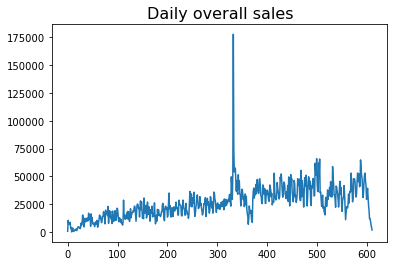

In [25]:
plt.plot(opsc_2['total'])
# plt.savefig('H:/project/total_sales.png')
plt.title('Daily overall sales',fontsize=16)

In [28]:
opsc_2.total[opsc_2['total']<=0]=1
# opsc_2=opsc_2.drop(axis=1,columns='index')

C:\Users\sandi\AppData\Local\Temp/ipykernel_16072/4213595107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opsc_2.total[opsc_2['total']<=0]=1


Text(0.5, 1.0, 'Boxplot of total Sale Price')

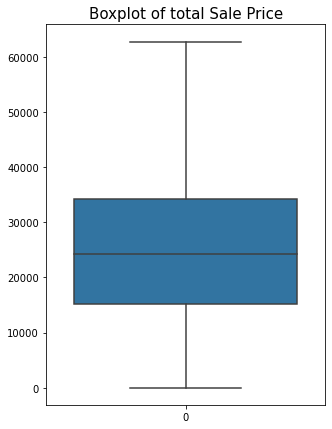

In [36]:
fig, ax= plt.subplots(figsize=(5,7))
sns.boxplot(data =opsc_2['total'])
ax.set_title('Boxplot of total Sale Price',fontsize=15)
# fig.savefig('H:/project/boxplot.png',bbox_inches='tight')

In [35]:
## Outlier adjustment
import statistics
opsc_2.iloc[opsc_2.total.idxmax(),0] = statistics.mean([opsc_2.iloc[(opsc_2.total.idxmax()+1),0],opsc_2.iloc[(opsc_2.total.idxmax()-1),0]])

In [37]:
overview(opsc_2)

Shape of the dataframe is : (611, 7)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total                 611 non-null    float64
 1   product_name_lenght   611 non-null    float64
 2   product_photos_qty    611 non-null    int32  
 3   product_weight_g      611 non-null    float64
 4   product_length_cm     611 non-null    float64
 5   product_width_cm      611 non-null    float64
 6   payment_installments  611 non-null    int32  
dtypes: float64(5), int32(2)
memory usage: 28.8 KB
Information about features :  None
************************************************************
Total number of null values : 
  total                   0
product_name_lenght     0
product_photos_qty      0
product_weight_g        0
product_length_cm       0
product_width_cm        0
pay

,total,product_name_lenght,product_photos_qty,product_weight_g,product_length_cm,product_width_cm,payment_installments
0,595.14,47.625000,1,2825.500000,27.000000,26.125000,2
1,10438.44,48.463768,1,2223.260870,33.072464,23.246377,3
2,7423.12,47.862745,1,2252.686275,28.235294,23.705882,3


In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
additive_decomposition = seasonal_decompose(opsc_2['total'], model='additive', period=30)

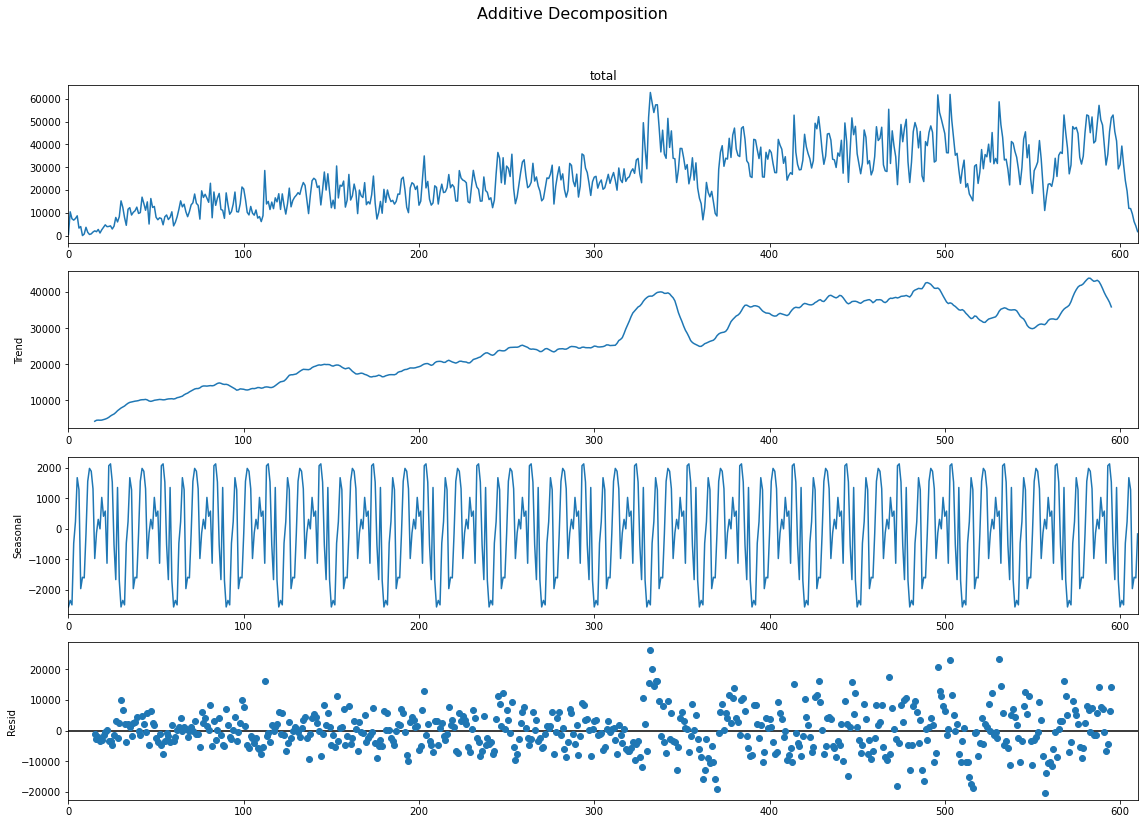

In [39]:
plt.rcParams.update({'figure.figsize': (16,12)})

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [40]:
multiplicative_decomposition = seasonal_decompose(opsc_2['total'], model='multiplicative', period=30)

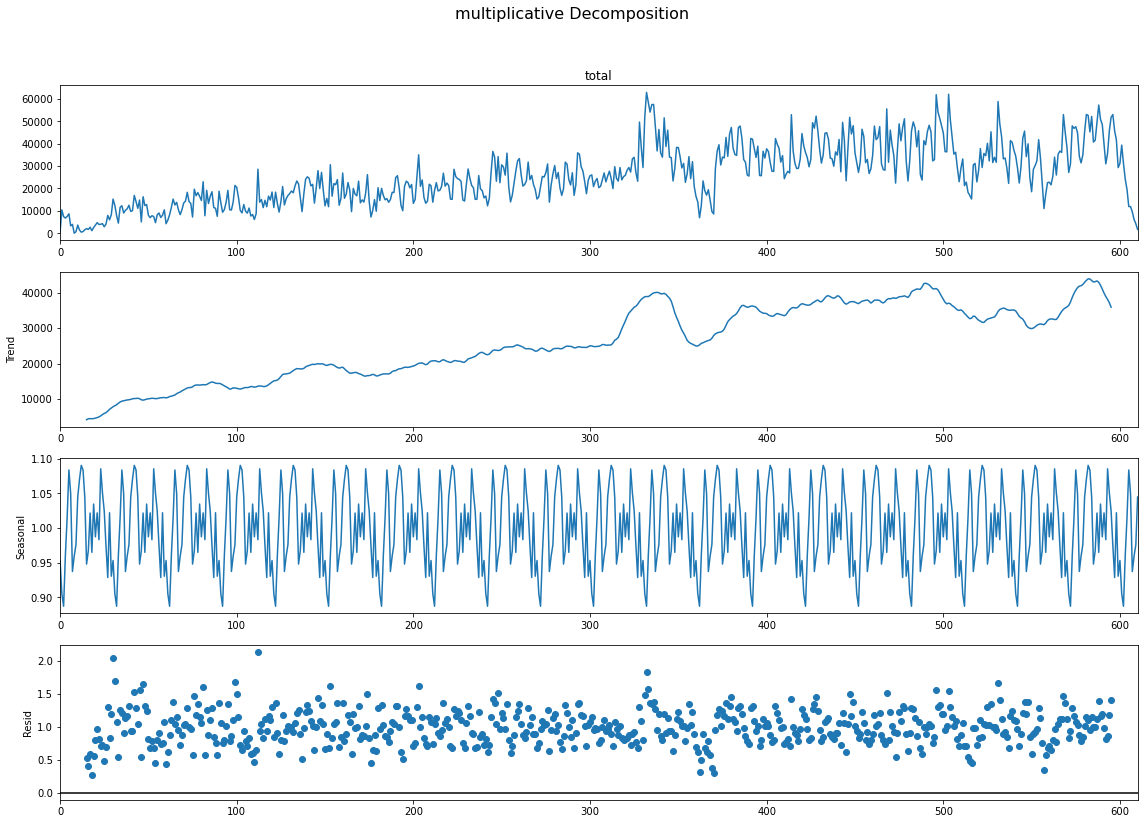

In [41]:
plt.rcParams.update({'figure.figsize': (16,12)})

multiplicative_decomposition.plot().suptitle('multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [42]:
opsc_2.total=opsc_2.total-additive_decomposition.seasonal

In [43]:
# opsc_2.t1[1:]=opsc_2.iloc[0:609,0]
# # opsc_2.t2[2:]=opsc_2.iloc[0:608,0]
# # opsc_2.t3[3:]=opsc_2.iloc[0:607,0]
# opsc_2['t1']=opsc_2.iloc[0:609,0]
opsc_2['t1']=opsc_2['total'].shift(1)
opsc_2['t2']=opsc_2['total'].shift(2)
opsc_2['t3']=opsc_2['total'].shift(3)

In [44]:
opsc_2=opsc_2.dropna().reset_index()

In [45]:
train, test = train_test_split(opsc_2, train_size=int(len(opsc_2)*0.9))

In [46]:
train=train.drop(axis=1,columns='index')
overview(train)

Shape of the dataframe is : (547, 10)
************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 547 entries, 0 to 546
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total                 547 non-null    float64
 1   product_name_lenght   547 non-null    float64
 2   product_photos_qty    547 non-null    int32  
 3   product_weight_g      547 non-null    float64
 4   product_length_cm     547 non-null    float64
 5   product_width_cm      547 non-null    float64
 6   payment_installments  547 non-null    int32  
 7   t1                    547 non-null    float64
 8   t2                    547 non-null    float64
 9   t3                    547 non-null    float64
dtypes: float64(8), int32(2)
memory usage: 42.7 KB
Information about features :  None
************************************************************
Total number of null values : 
  tota

,total,product_name_lenght,product_photos_qty,product_weight_g,product_length_cm,product_width_cm,payment_installments,t1,t2,t3
0,7272.056990,47.042553,2,1850.765957,30.489362,22.361702,3,9928.110367,12796.577025,3168.847016
1,7269.846078,47.586957,2,2598.717391,30.347826,24.086957,3,7272.056990,9928.110367,12796.577025
2,7008.720718,49.571429,3,2531.214286,32.785714,23.309524,4,7269.846078,7272.056990,9928.110367


In [47]:
test=test.reset_index()
test=test.drop(axis=1,columns=['index','level_0'])
overview(test)

Shape of the dataframe is : (61, 10)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total                 61 non-null     float64
 1   product_name_lenght   61 non-null     float64
 2   product_photos_qty    61 non-null     int32  
 3   product_weight_g      61 non-null     float64
 4   product_length_cm     61 non-null     float64
 5   product_width_cm      61 non-null     float64
 6   payment_installments  61 non-null     int32  
 7   t1                    61 non-null     float64
 8   t2                    61 non-null     float64
 9   t3                    61 non-null     float64
dtypes: float64(8), int32(2)
memory usage: 4.4 KB
Information about features :  None
************************************************************
Total number of null values : 
  total   

,total,product_name_lenght,product_photos_qty,product_weight_g,product_length_cm,product_width_cm,payment_installments,t1,t2,t3
0,18690.784700,48.311594,2,1901.275362,27.666667,22.115942,3,26489.844279,41471.290955,36147.701560
1,26942.623218,48.864130,2,2268.353261,28.902174,24.086957,3,18690.784700,26489.844279,41471.290955
2,28198.796157,48.882353,2,2206.452489,29.099548,22.366516,2,26942.623218,18690.784700,26489.844279


In [48]:
model_1=auto_arima(train['total'])
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  547
Model:               SARIMAX(4, 1, 5)   Log Likelihood               -5477.122
Date:                Thu, 23 Jun 2022   AIC                          10974.244
Time:                        03:48:21   BIC                          11017.270
Sample:                             0   HQIC                         10991.063
                                - 547                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8049      0.017     47.860      0.000       0.772       0.838
ar.L2         -1.4308      0.023    -63.220      0.000      -1.475      -1.386
ar.L3          0.7826      0.022     35.564      0.000       0.739       0.826
ar.L4         -0.9792      0.015    -64.834      0.000      -1.009      -0.950
ma.L1         -1.3625      0.043    -31.668      0.000      -1.447      -1.278
ma.L2          1.7888      0.060     29.908      0.000       1.672       1.906
ma.L3         -1.4907      0.078    -18.997      0.000      -1.645      -1.337
ma.L4          1.3306      0.060     22.275      0.000       1.214       1.448
ma.L5         -0.5246      0.042    -12.580      0.000      -0.606      -0.443
sigma2      3.635e+07   2.83e-10   1.28e+17      0.000    3.64e+07    3.64e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                95.23
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                             0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.22e+33. Standard errors may be unstable.
"""

rmse = 13024.2736235761
mape is =  80.00905854894125


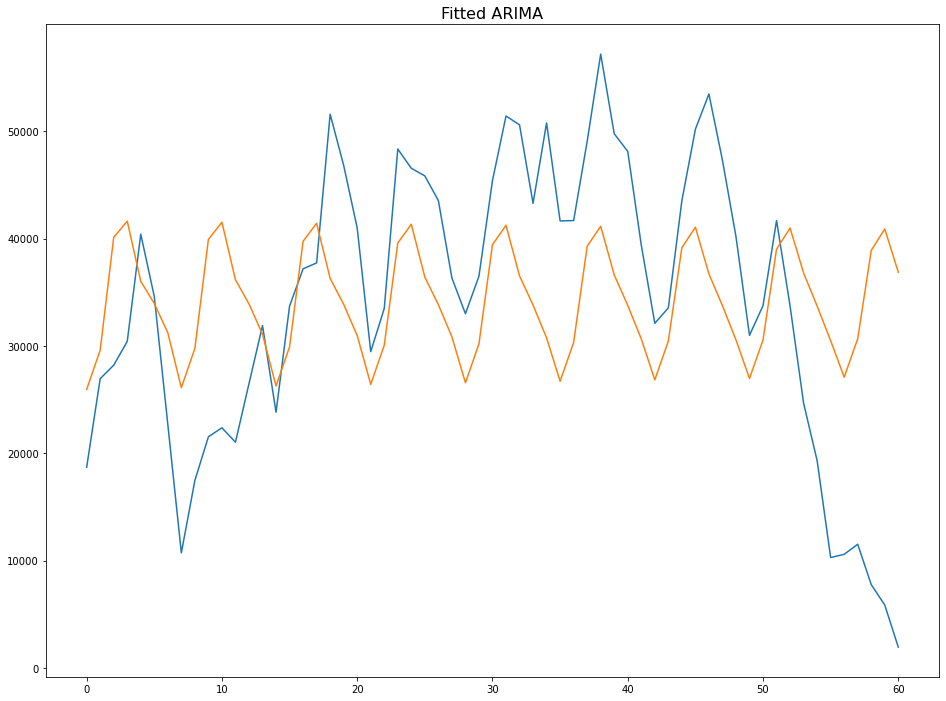

In [49]:
pred=model_1.predict(n_periods=61)
# rmse=print('RMSE is = ',(np.mean(test_ded-pred)**2)**.5)
mse=mean_squared_error(test['total'],pred)
print('rmse =',np.sqrt(mse))
plt.plot(test['total'])
plt.plot(pred)
mape=np.mean(np.abs((test['total']-pred) / test['total'])) * 100
print('mape is = ',mape)
plt.title('Fitted ARIMA',fontsize=16)
plt.savefig('H:/project/arima.png',bbox_inches='tight')

In [50]:
warnings.filterwarnings('ignore')

In [51]:
regr = RandomForestRegressor()
regr.fit(train.iloc[:,1:], train['total'])
# test['t1']=test['t1'].reshape(-1,1)
for i in range(61):
    pre=regr.predict(test.iloc[i,1:].array.reshape(1,- 1))
    test['t1'].loc[i+1]=pre
    test['t2'].loc[i+1]=test.t1[i]
    test['t3'].loc[i+1]=test.t2[i]
predict=regr.predict(test.iloc[:,1:])

In [53]:
# regr = RandomForestRegressor()
# regr.fit(train.iloc[:,1:], train['total'])

In [52]:
# for i in range(61):
#     predict=regr.predict(test.iloc[i:(i+1),1:])
#     test.t1[(i+1)]=predict
#     test.t2[(i+1)]=test.t1[i]
#     test.t3[(i+1)]=test.t2[i]
#     print(i,predict)
# #     #test['t1'].loc[i+1]=predict.loc[i]

In [212]:
# # # predict=regr.predict(test.iloc[0:3,2:])
# # # print(predict)
# predict=regr.predict(test.iloc[:,2:])
# print(predict[0:5])

In [54]:
# # predict=regr.predict(test.iloc[0:3,2:])
# # print(predict)
# predict1=regr.predict(test.iloc[:,2:])
# print(predict1[0:5])

rmse = 12948.245190958638
mape is =  78.10149522682453


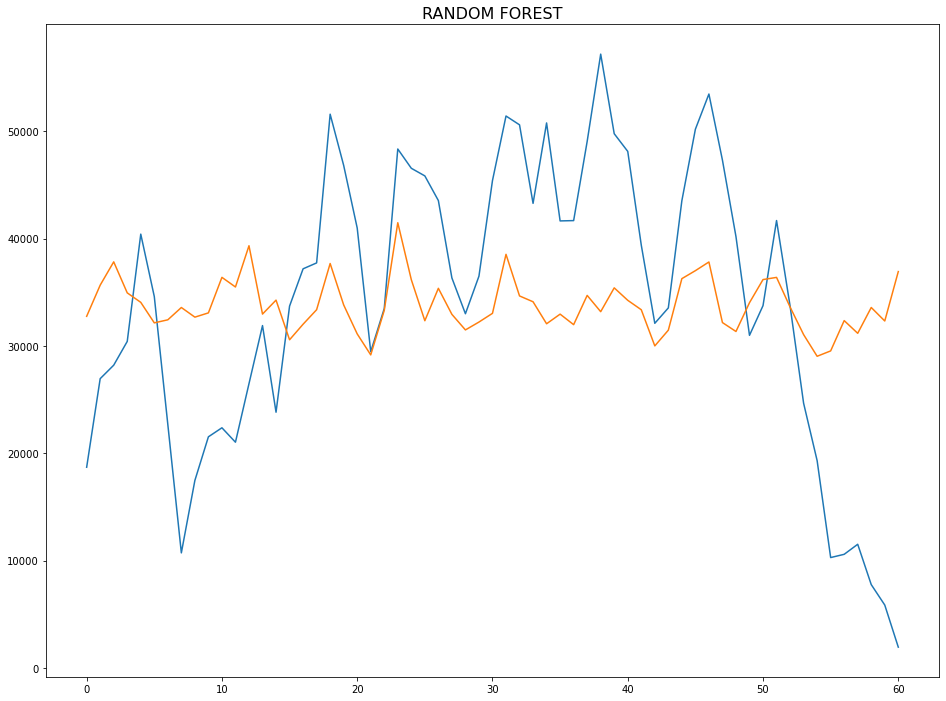

In [55]:
mse=mean_squared_error(test['total'],predict)
print('rmse =',np.sqrt(mse))
plt.plot(test['total'])
plt.plot(predict)
mape=np.mean(np.abs((test['total']-predict) / test['total'])) * 100
print('mape is = ',mape)
plt.title('RANDOM FOREST',fontsize=16)
plt.savefig('H:/project/RNDF.png',bbox_inches='tight')

In [56]:
regtre=tree.DecisionTreeRegressor(min_samples_leaf=int(len(opsc_2)*.02))
regtre.fit(train.iloc[:,1:], train['total'])


DecisionTreeRegressor(min_samples_leaf=12)

In [57]:
for i in range(60):
    predict=regtre.predict(test.iloc[i:(i+1),1:])
    test.t1[(i+1)]=predict
    test.t2[(i+1)]=test.t1[i]
    test.t3[(i+1)]=test.t2[i]
    print(i,predict)

0 [34943.76090288]
1 [33838.85639453]
2 [42732.79648468]
3 [34586.17974006]
4 [35035.18347863]
5 [42732.79648468]
6 [34586.17974006]
7 [35035.18347863]
8 [42732.79648468]
9 [42998.67546861]
10 [34586.17974006]
11 [35035.18347863]
12 [42732.79648468]
13 [34586.17974006]
14 [35035.18347863]
15 [42732.79648468]
16 [34586.17974006]
17 [27550.04813648]
18 [27508.42022029]
19 [27550.04813648]
20 [27550.04813648]
21 [34943.76090288]
22 [42732.79648468]
23 [42998.67546861]
24 [34586.17974006]
25 [27550.04813648]
26 [34943.76090288]
27 [42732.79648468]
28 [34586.17974006]
29 [27550.04813648]
30 [34943.76090288]
31 [42732.79648468]
32 [34586.17974006]
33 [35035.18347863]
34 [42732.79648468]
35 [34586.17974006]
36 [35035.18347863]
37 [42732.79648468]
38 [34586.17974006]
39 [33838.85639453]
40 [42732.79648468]
41 [34586.17974006]
42 [33838.85639453]
43 [33838.85639453]
44 [33838.85639453]
45 [42732.79648468]
46 [34586.17974006]
47 [35035.18347863]
48 [42732.79648468]
49 [34586.17974006]
50 [35035.

rmse = 14499.882697563018
mape is =  84.71271415142084


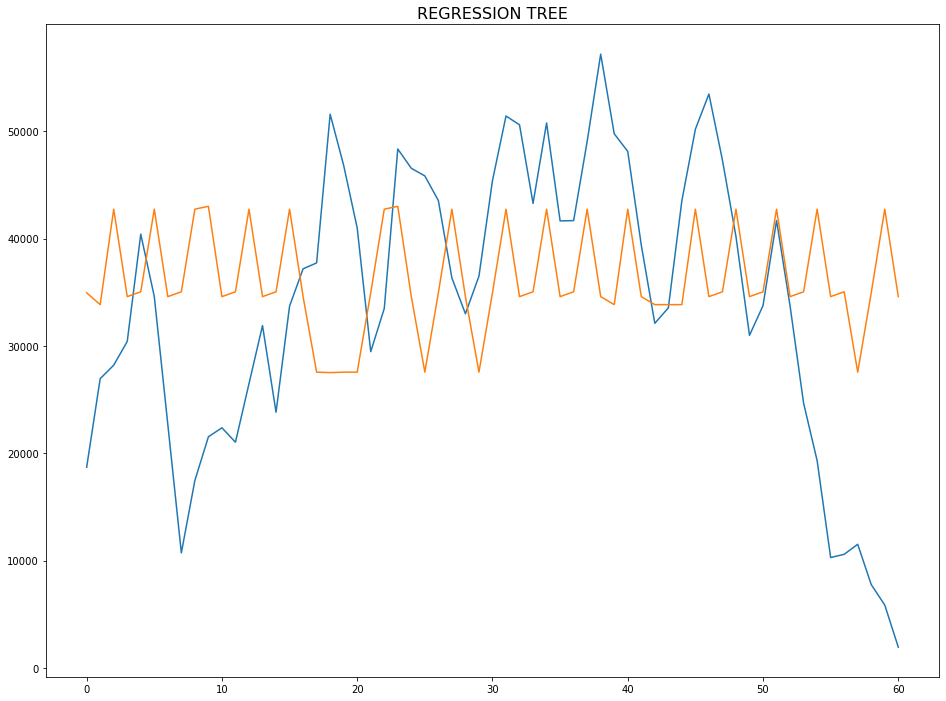

In [58]:
predict_tr=regtre.predict(test.iloc[:,1:])
mse=mean_squared_error(test['total'],predict_tr)
print('rmse =',np.sqrt(mse))
plt.plot(test['total'])
plt.plot(predict_tr)
mape=np.mean(np.abs((test['total']-predict_tr) / test['total'])) * 100
print('mape is = ',mape)
plt.title('REGRESSION TREE',fontsize=16)
plt.savefig('H:/project/RTRE.png',bbox_inches='tight')

In [487]:
# regtre=tree.DecisionTreeRegressor(min_samples_leaf=int(len(opsc_2)*.02))
# regtre.fit(train.iloc[:,1:], train['total'])
# predict_tr=regtre.predict(test.iloc[:,2:])

rmse = 13185.61921322647
mape is =  74.31494316568873


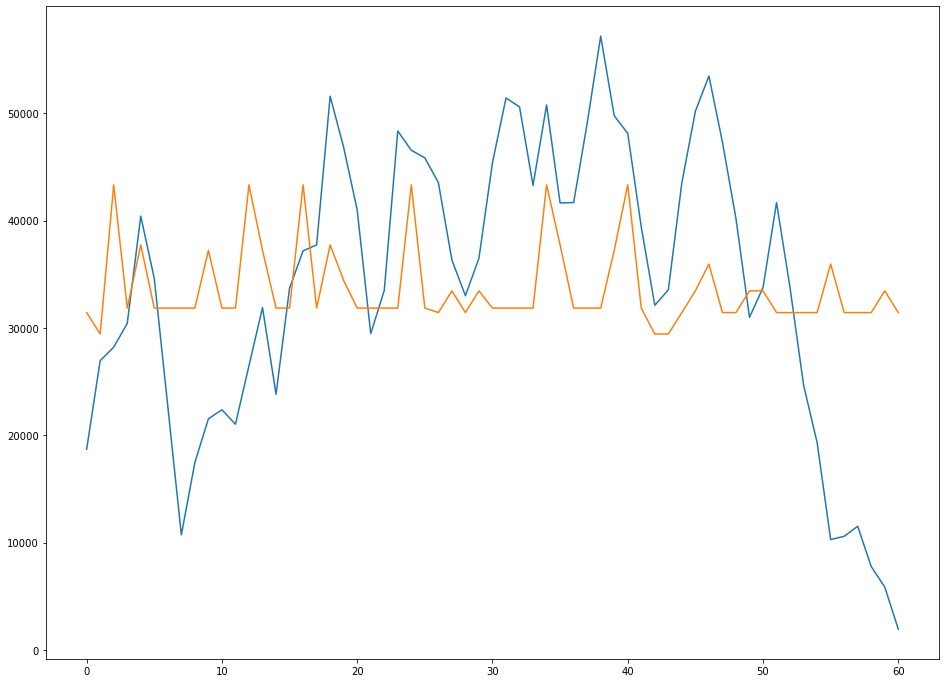

In [488]:
# mse=mean_squared_error(test['total'],predict_tr)
# print('rmse =',np.sqrt(mse))
# plt.plot(test['total'])
# plt.plot(predict_tr)
# mape=np.mean(np.abs((test['total']-predict_tr) / test['total'])) * 100
# print('mape is = ',mape)

In [59]:
import xgboost as xgb

In [60]:
xgbm = xgb.XGBRegressor()
xgbm.fit(train.iloc[:,1:], train['total'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [61]:
for i in range(60):
    predict=xgbm.predict(test.iloc[i:(i+1),1:])
    test.t1[(i+1)]=predict
    test.t2[(i+1)]=test.t1[i]
    test.t3[(i+1)]=test.t2[i]
    print(i,predict)

0 [27744.334]
1 [36874.39]
2 [43067.97]
3 [34647.605]
4 [33641.78]
5 [28548.887]
6 [30984.174]
7 [36769.44]
8 [35240.3]
9 [33670.254]
10 [32828.656]
11 [33023.227]
12 [37199.027]
13 [33375.85]
14 [31952.314]
15 [36385.81]
16 [33632.773]
17 [35091.85]
18 [35750.145]
19 [29701.525]
20 [24691.63]
21 [30079.46]
22 [32632.426]
23 [33028.883]
24 [35687.64]
25 [29177.764]
26 [34260.06]
27 [37224.72]
28 [32129.57]
29 [31109.674]
30 [32013.543]
31 [41141.547]
32 [34506.09]
33 [39339.63]
34 [36294.918]
35 [33450.53]
36 [30518.236]
37 [23817.488]
38 [32347.162]
39 [35676.832]
40 [30298.506]
41 [32609.19]
42 [31449.393]
43 [30606.734]
44 [36500.63]
45 [42812.72]
46 [37455.074]
47 [36138.348]
48 [31493.543]
49 [37042.832]
50 [31128.691]
51 [26816.572]
52 [25596.072]
53 [24271.338]
54 [25105.688]
55 [14167.813]
56 [14025.335]
57 [19454.04]
58 [14143.637]
59 [16823.67]


rmse = 11284.767918070555
mape is =  41.3110130025276


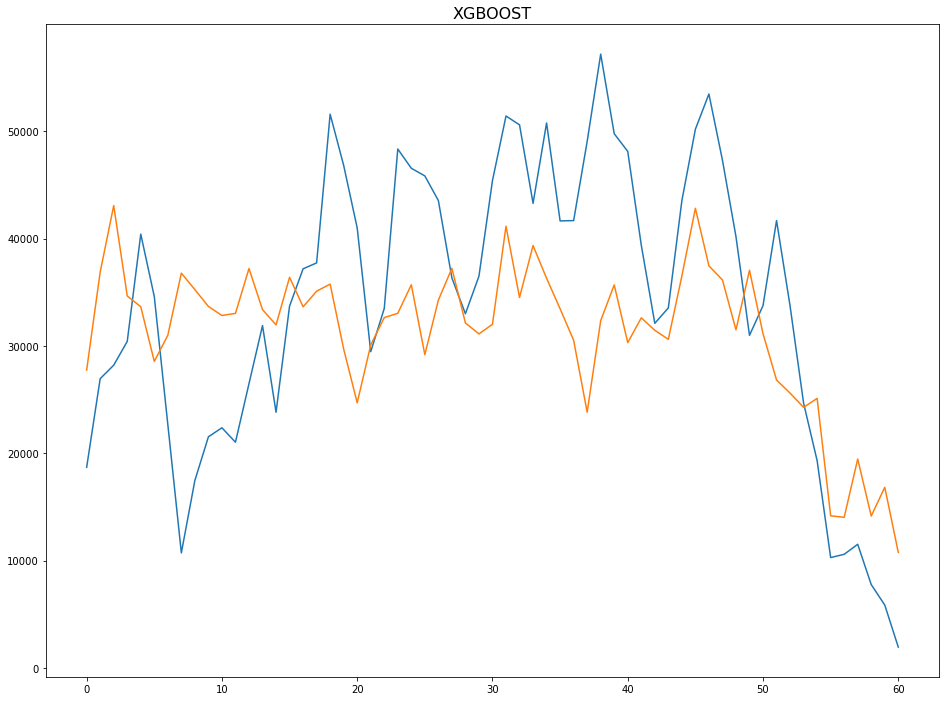

In [62]:
predict_tr=xgbm.predict(test.iloc[:,1:])
mse=mean_squared_error(test['total'],predict_tr)
print('rmse =',np.sqrt(mse))
plt.plot(test['total'])
plt.plot(predict_tr)
mape=np.mean(np.abs((test['total']-predict_tr) / test['total'])) * 100
print('mape is = ',mape)
plt.title('XGBOOST',fontsize=16)
plt.savefig('H:/project/XGB.png',bbox_inches='tight')

In [63]:
from sklearn.svm import SVR

In [64]:
svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')

In [65]:
svr_poly.fit(train.iloc[:,1:], train['total'])

SVR(kernel='poly')

In [67]:
for i in range(60):
    predict=svr_poly.predict(test.iloc[i:(i+1),1:])
    test.t1[(i+1)]=predict
    test.t2[(i+1)]=test.t1[i]
    test.t3[(i+1)]=test.t2[i]
    print(i,predict)

0 [25110.20705613]
1 [24439.93171518]
2 [23692.81092757]
3 [23595.75628077]
4 [23546.62121813]
5 [23519.01356497]
6 [23513.33990192]
7 [23510.77771364]
8 [23509.58354526]
9 [23509.65374623]
10 [23510.43116224]
11 [23510.17761917]
12 [23510.85515369]
13 [23509.45724816]
14 [23509.82869139]
15 [23509.25826451]
16 [23509.36382067]
17 [23508.97783951]
18 [23510.04884044]
19 [23510.06198087]
20 [23509.10568623]
21 [23508.96682786]
22 [23509.24881625]
23 [23509.82447606]
24 [23509.42786729]
25 [23509.50396817]
26 [23510.19291979]
27 [23509.301252]
28 [23509.21677774]
29 [23509.9845657]
30 [23509.12503364]
31 [23509.93422326]
32 [23509.46903193]
33 [23509.40318218]
34 [23508.97844874]
35 [23509.5937342]
36 [23509.20061808]
37 [23509.57784791]
38 [23509.03811235]
39 [23509.3224903]
40 [23509.28043909]
41 [23509.41157001]
42 [23508.87654766]
43 [23509.57562807]
44 [23509.46787968]
45 [23509.70487094]
46 [23509.42801265]
47 [23508.88861834]
48 [23509.3854986]
49 [23509.41339304]
50 [23509.505852

rmse = 17087.80275800683
mape is =  65.70104344994304


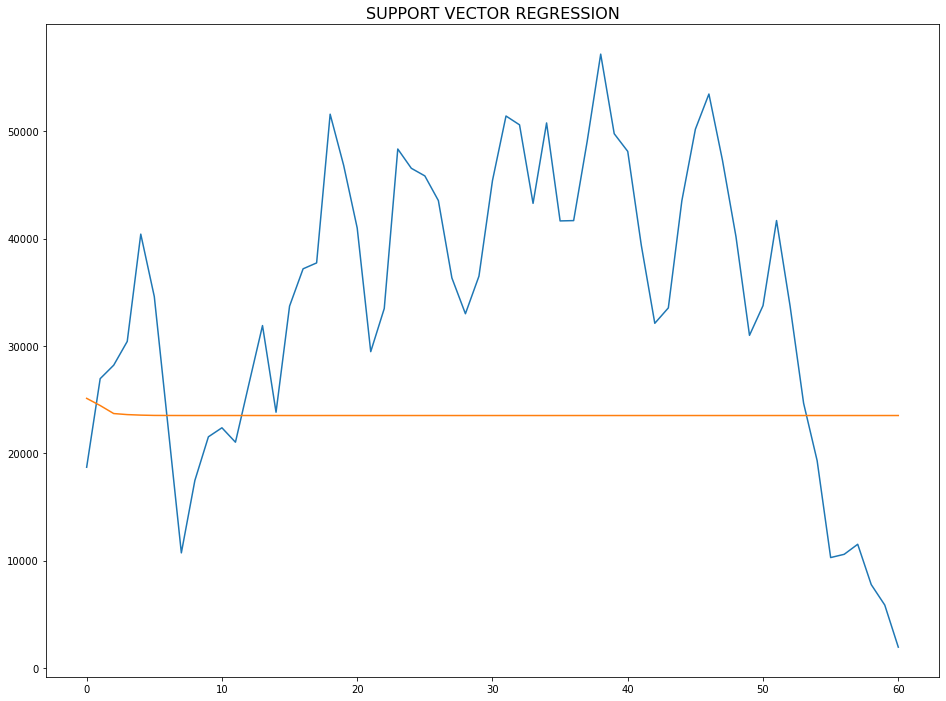

In [68]:
predict_rb=svr_poly.predict(test.iloc[:,1:])
mse=mean_squared_error(test['total'],predict_rb)
print('rmse =',np.sqrt(mse))
plt.plot(test['total'])
plt.plot(predict_rb)
mape=np.mean(np.abs((test['total']-predict_rb) / test['total'])) * 100
print('mape is = ',mape)
plt.title('SUPPORT VECTOR REGRESSION',fontsize=16)
plt.savefig('H:/project/SVR.png',bbox_inches='tight')